In [2]:
from dotenv import load_dotenv
import os

In [7]:
import os
import dotenv
import sqlalchemy
import pandas as pd

dotenv.load_dotenv(override=True, dotenv_path=".env.txt")

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbnameT")

connection_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname

db_engine = sqlalchemy.create_engine(connection_string)

Sul database titanic, effettuiamo le seguenti analisi:

In [78]:
df= pd.read_sql("SELECT*FROM titanic",db_engine)


In [111]:
df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?

In [109]:
df_pulito = df.dropna(subset=['Cabin'])


lettera = set()

for cabin in df_pulito['Cabin']:
    if cabin:  
        prima_lettera = cabin[0]  
        lettera.add(prima_lettera)  
lettera_in_ordine = sorted(prima_lettera)

print(lettera_in_ordine)

['C']


In [113]:
unique_letters = set()

# Ciclo for per estrarre la prima lettera di ogni valore nella colonna 'Cabin'
for cabin in df_clean['Cabin']:
    if cabin:  # Controlla che la stringa non sia vuota
        first_letter = cabin[0]  # Estrai la prima lettera
        unique_letters.add(first_letter)  # Aggiungi la lettera al set

# Ordina le lettere uniche in ordine alfabetico
sorted_letters = sorted(unique_letters)

# Mostra la lista ordinata
print(sorted_letters)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


In [115]:
len(sorted_letters)

8

In [117]:
import seaborn as sns

Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)

<Axes: xlabel='PClass', ylabel='count'>

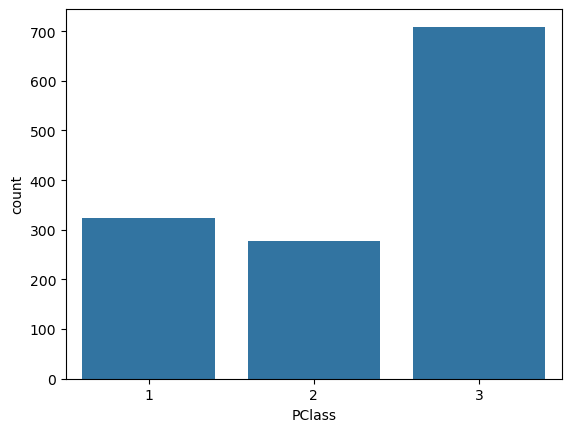

In [127]:
sns.countplot(data=df,x='PClass')

Fare la stessa cosa per la colonna Survived

<Axes: xlabel='Survived', ylabel='count'>

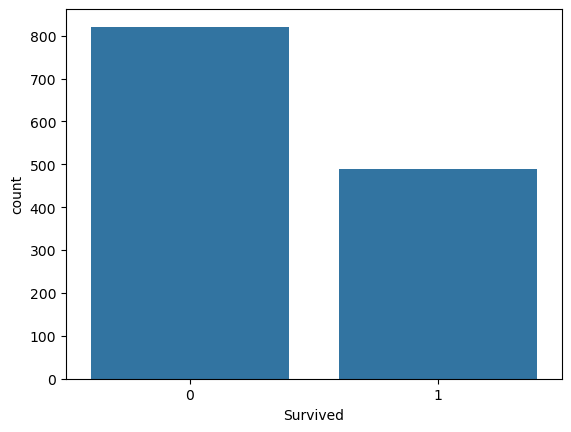

In [129]:
sns.countplot(data=df,x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

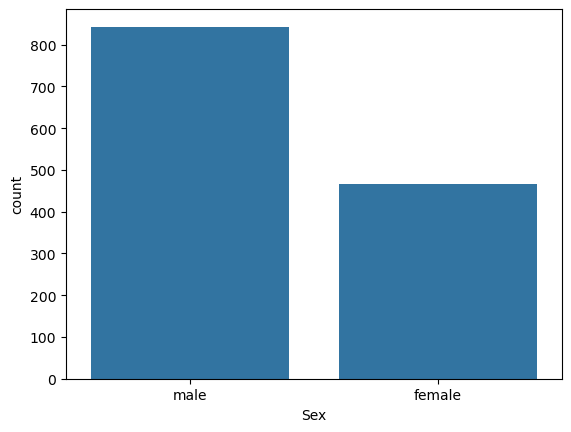

In [147]:
sns.countplot(data=df,x='Sex')

<Axes: xlabel='Age', ylabel='count'>

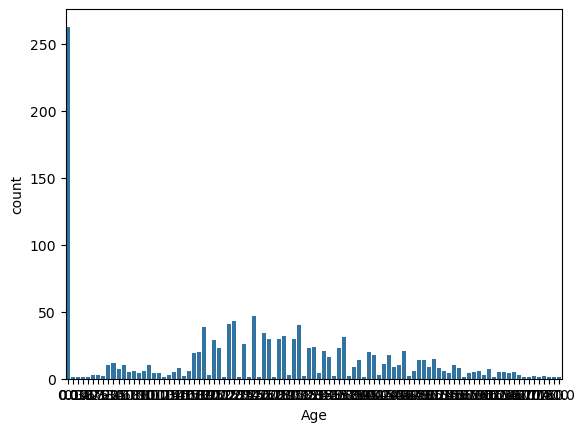

In [149]:
sns.countplot(data=df,x='Age')

<Axes: ylabel='Frequency'>

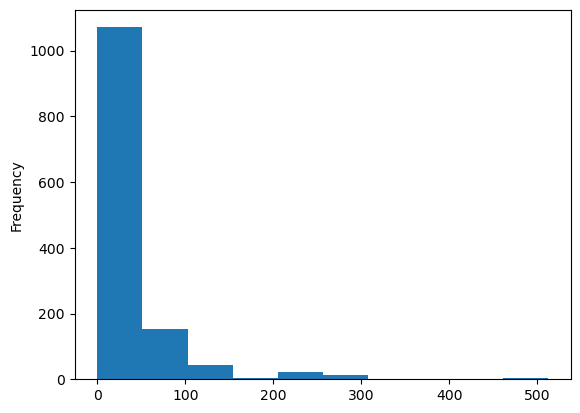

In [143]:
df.Fare.plot(kind='hist')

Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?

<Axes: xlabel='PClass', ylabel='Age'>

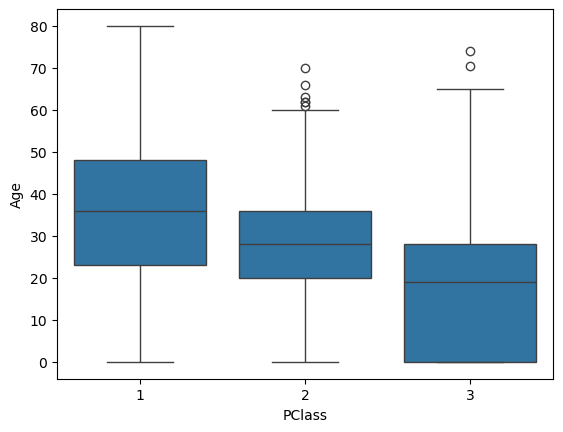

In [145]:
sns.boxplot(data=df,x="PClass",y="Age")

Visualizziamo un boxplot rispetto alle colonne Fare e Survived, che cosa ne deduciamo?


<Axes: xlabel='Survived', ylabel='Fare'>

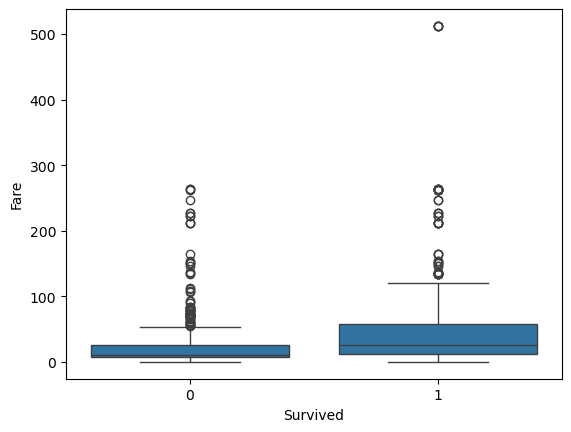

In [153]:
sns.boxplot(data=df,x="Survived",y="Fare")

Esercizio Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv :

In [225]:
import pandas as pd

# Carica il file CSV
df = pd.read_csv('election.csv')

# Visualizza le prime righe del DataFrame per verificare che il caricamento sia avvenuto correttamente
print(df.head())


                district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112  


In [213]:
import pandas as pd

# Carica il dataset
df = pd.read_csv('election.csv')

# Seleziona solo le colonne numeriche
numero_voti = df.select_dtypes(include=['int64', 'float64']).columns

# Escludi la colonna 'total' e 'district_id' dalla lista delle colonne numeriche
numero_voti = [col for col in numero_voti if col not in ['total', 'district_id']]

# Somma i voti per ogni colonna numerica (eccetto 'total' e 'district_id')
voti_candidato = df[numero_voti].sum()

# Mostra i risultati
print(voti_candidato)


Coderre     149467
Bergeron    118637
Joly        123062
dtype: int64


C:\Users\39333\AppData\Local\Temp\ipykernel_8916\282841779.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Candidate', y='Total Votes', data=votes_df, palette='Set2')


<Axes: xlabel='Candidate', ylabel='Total Votes'>

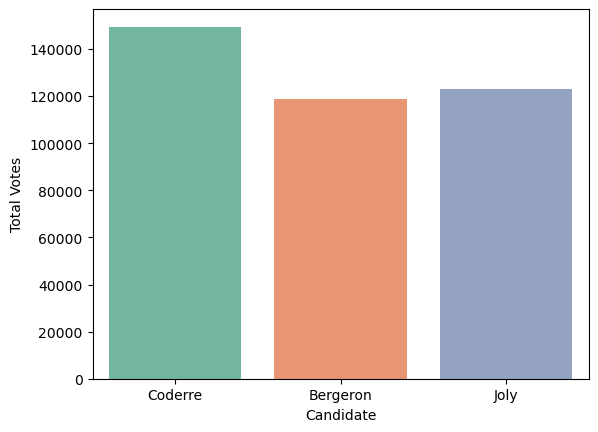

In [215]:
sns.barplot(x='Candidate', y='Total Votes', data=votes_df, palette='Set2')

C:\Users\39333\AppData\Local\Temp\ipykernel_8916\3558790252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='district', y='total', data=top_10_distretti, palette='Set2')


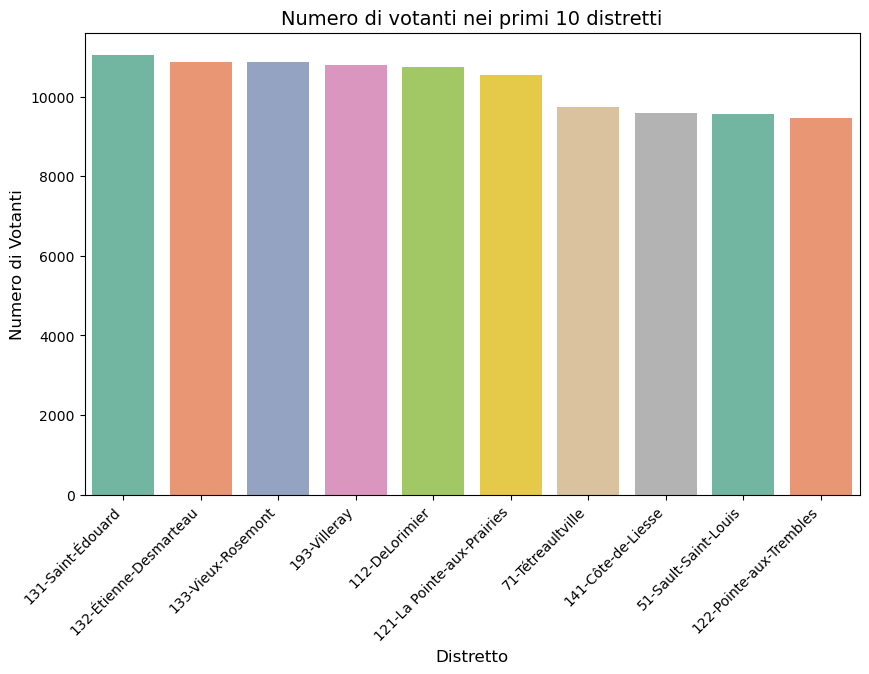

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv('election.csv')

# Ordinare i distretti in base al numero di votanti (colonna 'total') in ordine decrescente
top_10_distretti = df.nlargest(10, 'total')

# Crea un grafico a barre per i primi 10 distretti
plt.figure(figsize=(10, 6))
sns.barplot(x='district', y='total', data=top_10_distretti, palette='Set2')

# Aggiungi titolo e etichette
plt.title('Numero di votanti nei primi 10 distretti', fontsize=14)
plt.xlabel('Distretto', fontsize=12)
plt.ylabel('Numero di Votanti', fontsize=12)

# Ruota le etichette dell'asse x per renderle più leggibili
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.show()

